In [10]:
import pandas as pd #needed to import dataset

# Load a CSV file
full = pd.read_csv("C:/Users/annaw/Desktop/DataScience/Datasets/full_dataset.csv",
    dtype={91: str})



0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
11357           NaN
11358    2021-12-21
11359    2022-01-28
11360           NaN
11361           NaN
Name: Unnamed: 0.1.1, Length: 11362, dtype: object


In [16]:
# Basic info
print(full.info())  # data types, missing values
print(full.head())  # first few rows
print(full.describe())  # statistics for numerical columns

# Check for missing values
print(full.isnull().sum())

# drop columns with >20% missing
full_clean = full.dropna(thresh=len(full)*0.8, axis=1)  
print(full_clean.info())  # data types, missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11362 entries, 0 to 11361
Data columns (total 95 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datum                  11362 non-null  object 
 1   station_code           11362 non-null  object 
 2   aspect                 11362 non-null  float64
 3   elevation              11362 non-null  float64
 4   avalancheDay1          11362 non-null  int64  
 5   max_height             11362 non-null  float64
 6   TSS_mod                11362 non-null  float64
 7   prop_base_3_diff       11362 non-null  float64
 8   ILWR_daily             11362 non-null  float64
 9   RH_daily               11362 non-null  float64
 10  ISWR_diff_daily        11362 non-null  float64
 11  prop_base_1_diff       11362 non-null  float64
 12  prop_wet_2_diff        11362 non-null  float64
 13  prop_wet_3_diff        11362 non-null  float64
 14  max_height_3_diff      11362 non-null  float64
 15  lo

In [26]:
###### Random forest to find important features

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix,
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from matplotlib.pylab import rcParams
from sklearn.preprocessing import StandardScaler


In [27]:
# Drop non-numeric columns and missing data
full_clean = full.dropna(thresh=len(full)*0.8, axis=1)
full_clean = full_clean.dropna()  # drop rows with missing values

# Encode categorical variables - models can only use numbers not text
categorical_cols = full_clean.select_dtypes(include='object').columns
full_encoded = pd.get_dummies(full_clean, columns=categorical_cols, drop_first=True)

# Split features and target
X = full_encoded.drop(columns=["avalancheDay1"])
y = full_encoded["avalancheDay1"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Train Decision Tree
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Decision Tree Evaluation:
[[1923    0]
 [ 124   12]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1923
           1       1.00      0.09      0.16       136

    accuracy                           0.94      2059
   macro avg       0.97      0.54      0.57      2059
weighted avg       0.94      0.94      0.92      2059



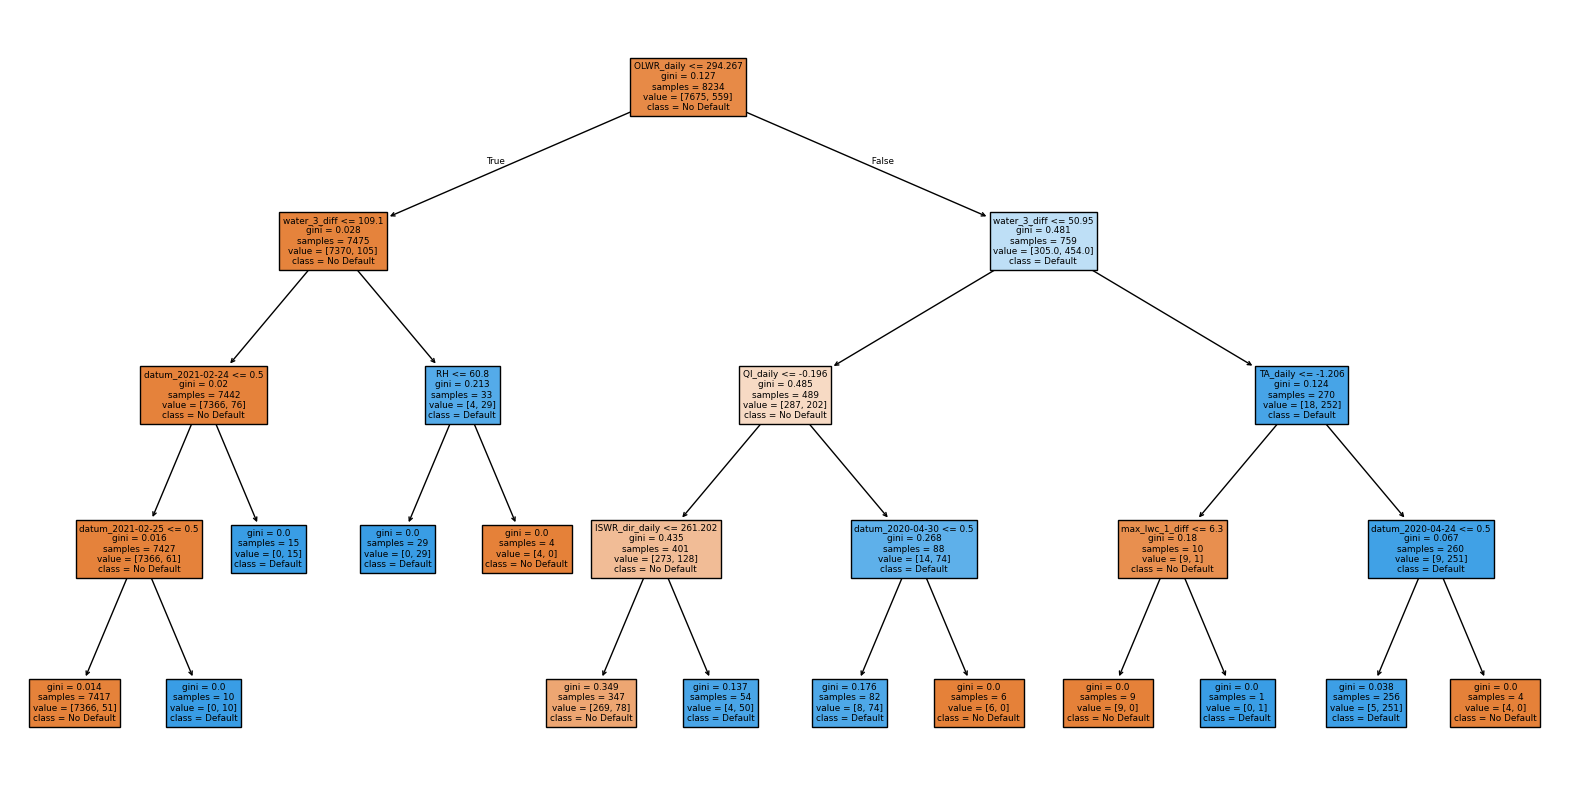

In [38]:
# Predict and evaluate
y_pred_tree = clf_tree.predict(X_test_scaled)
print("Decision Tree Evaluation:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(clf_tree, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)
plt.show()

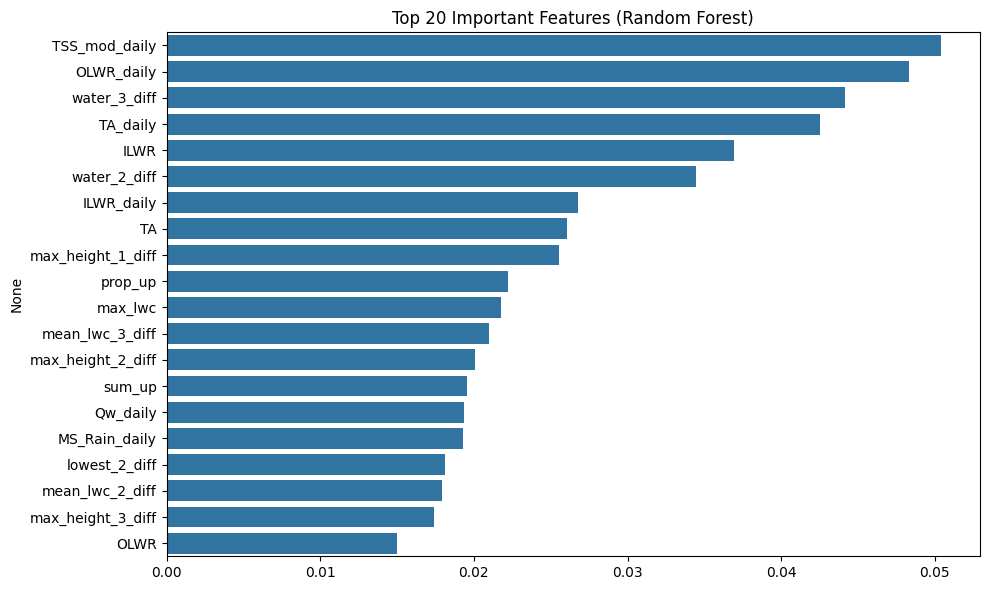

In [41]:
# Train Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_scaled, y_train)

# Feature importance
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices][:20]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=top_features)
plt.title("Top 20 Important Features (Random Forest)")
plt.tight_layout()
plt.show()